![title](01.png)

## Solution: (1) Least-squares regression

Soppose the separation boundary is $f(x) = w_{1}x_{1} + w_{2}x_{2} + w_{0}$. We define the least square distance $$F(w_{1},w_{2},w_{0}) = \sum_{(x_{ip1},x_{ip2}) \in xp}(w_{1}x_{ip1}+w_{2}x_{ip2}+w_{0}-1)^{2}+ \sum_{(x_{im1}, x_{im2}) \in xm}(w_{1}x_{im1} + w_{2}x_{im2} + w_{0}+1)^{2}$$

Let $\mathbf{w} = (w_{1}, w_{2}, w_{0})$

\begin{equation}
\mathbf{X}: = 
\begin{bmatrix}
x_{1p1}w_{1}+x_{1p2}w_{2}+w_{0}-1\\
x_{2p1}w_{1}+x_{2p2}w_{2}+w_{0}-1\\
\vdots\\
x_{np1}w_{1}+x_{np1}w_{2}+w_{0}-1
\end{bmatrix}
=
\begin{bmatrix}
x_{1p1}&x_{1p2}&1\\
x_{2p1}&x_{2p2}&1\\
\vdots&\vdots&\vdots\\
x_{np1}&x_{np2}&1\\
\end{bmatrix}
\begin{bmatrix}
w_{1}\\
w_{2}\\
w_{0}
\end{bmatrix}
-
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix}
\end{equation}

Let 

\begin{equation}
\mathbf{A} := 
\begin{bmatrix}
x_{1p1}&x_{1p2}&1\\
x_{2p1}&x_{2p2}&1\\
\vdots&\vdots&\vdots\\
x_{np1}&x_{np2}&1\\
\end{bmatrix}
\mathbf{1}: = 
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix}
\end{equation}

Then $\mathbf{X} = \mathbf{A}\mathbf{w}-\mathbf{1}$

\begin{equation}
\mathbf{ \widetilde{X}}:=
\begin{bmatrix}
x_{1m1}w_{1}+x_{1m2}w_{2}+W_{0}+1\\
x_{2m1}w_{1}+x_{2m2}w_{2}+w_{0}+1\\
\vdots\\
x_{mm1}w_{1}+x_{mm1}w_{2}+w_{0}+1
\end{bmatrix}
=
\begin{bmatrix}
x_{1m1}&x_{1m2}&1\\
x_{2m1}&x_{2m2}&1\\
\vdots&\vdots&\vdots\\
x_{mm1}&x_{mm2}&1\\
\end{bmatrix}
\begin{bmatrix}
w_{1}\\
w_{2}\\
w_{0}
\end{bmatrix}
+
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix}
\end{equation}

Let 

\begin{equation}
\mathbf{\widetilde{A}} := 
\begin{bmatrix}
x_{1m1}&x_{1m2}&1\\
x_{2m1}&x_{2m2}&1\\
\vdots&\vdots&\vdots\\
x_{mm1}&x_{mm2}&1\\
\end{bmatrix}
\mathbf{\widetilde{1}}: = 
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix}
\end{equation}

Then $\mathbf{\widetilde{X}} = \mathbf{\widetilde{A}}\mathbf{w}+\mathbf{\widetilde{1}}$

Then $$F(\mathbf{w}) = (\mathbf{A}\mathbf{w}-\mathbf{1})^{T}(\mathbf{A}\mathbf{w}-\mathbf{1})+
(\mathbf{\widetilde{A}}\mathbf{w}+\mathbf{\widetilde{1}})^{T}(\mathbf{\widetilde{A}}\mathbf{w}+\mathbf{\widetilde{1}})$$
$$\nabla F(\mathbf{w}) = 2\mathbf{A}^{T}(\mathbf{A}\mathbf{w}-\mathbf{1}) + 2 \mathbf{\widetilde{A}}^{T}(\mathbf{\widetilde{A}}\mathbf{w}+\mathbf{\widetilde{1}}) $$
We use gradient descent to solve this problems

In [41]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# data
A1 = np.array([[2,1,1],[3,2,1],[3.5,3,1],[4.5,2.5,1],[4.7,1.5,1],[5,1,1],[8,2,1],[1,6,1],[0.5,5.5,1],[0.2,7,1],[1.5,6.8,1]])
A2 = np.array([[-1,-1,1],[-2,-3,1],[-3.5,-2,1],[-4,-1.5,1],[-4.5,-2.5,1],[-8,-2,1]])

AA = np.dot(A1.T,A1) + np.dot(A2.T,A2)
yy = np.dot(A1.T,A1[:,2]) - np.dot(A2.T, A2[:,2])

w = LA.solve(AA,yy)     # the true sloution
print(w)

[ 0.13414641  0.16020865 -0.03974608]


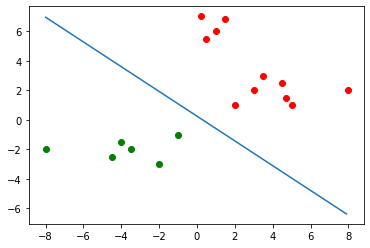

In [61]:
X = np.arange(-8,8,0.1)
Y = -(w[0]/w[1])*X-(w[2]/w[1])

#ax = plt.subplot(111, projection='3d')
plt.scatter(A1[:,0],A1[:,1],c='r')
plt.scatter(A2[:,0],A2[:,1],c='g')
plt.plot(X,Y)
plt.show()
#ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,linewidth=0,antialiased=False)

In [48]:
def F(A1,A2,w):
    X1 = np.dot(A1,w)-1
    X2 = np.dot(A2,w)+1
    F = np.dot(X1.T, X1)+ np.dot(X2.T,X2)
    return F

def DF(A1,A2,w):
    X1 = np.dot(A1,w)-1
    X2 = np.dot(A2,w)+1
    DF = 2* np.dot(A1.T, X1)+2*np.dot(A2.T,X2)
    return DF

In [49]:
# gradient descent 
eta = 0.001               # learning rate
w1,w2,w0 = 1, 1, 1        # intial parameter
epsilon = 0.01             # stop crition

# store all the intermediate values during the descents:
# w1_val = []
# w2_val = []
# w0_val = []
F_val = [] 
#DF_val = []
k = 0                    # compute the number of descent

while LA.norm(DF(A1,A2,np.array([w1,w2,w0]))) > epsilon:
    (w1,w2,w0) = np.array([w1,w2,w0]) - eta * DF(A1,A2,np.array([w1,w2,w0]))
    # w1_val.append(w1)
    # w2_val.append(w2)
    # w0_val.append(w0)
    F_val.append(F(A1,A2,np.array([w1,w2,w0])))
    # DF_val.append(LA.norm(DF(A1,A2,np.array([w1,w2,w0]))))
    k = k+1

The number of the iteration is 288
The min of F is 1.5073064085731036 at the parameter (0.13415698771926077, 0.1601547448389182, -0.039382342845273595)


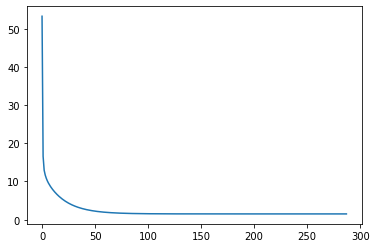

In [50]:
print("The number of the iteration is", k)
print("The min of F is", F(A1,A2,np.array([w1,w2,w0])), "at the parameter", (w1,w2,w0))
plt.plot(range(k), F_val)
plt.show()

In this problem, I find it is difficult to find a suitable learning rate. If I choose more than 0.0027, this method will not convergence. Since the learning is very small, so the it need many iterations.

## (2) Logistic regression

Suppose the linear boundary is $f(x) = w_{1}x_{1}+w_{2}x_{2}+w_{0}$, and Logistic function $\sigma (t) = \frac{1}{1+e^{-t}}$. Logistic is comtine maximum likelihood and use logistic function to defined the probability. We describe the process as following.

### Maximum Likelihood
+ Given training data $(\mathbf{x_{j}}, y_{j})$, where $y_{j} \in \{1,-1\}$ for $j = 1,\cdots, N$

+ Find $\mathbf{w}$ to maxmize $L(\mathbf{w}) = P(y_{1},y_{2},\cdots, y_{N} | \mathbf{x_{1}, x_{2}, \cdots, x_{N}, w})$. Assume the train data are sample i.i.d:
$$P(y_{1},\cdots, y_{N} | \mathbf{x_{1}, \cdots, x_{N}, w}) = \Pi_{j=1}^{N} P(y_{j}| \mathbf{x_{j},w})$$
where

\begin{equation}
P(y_{j}|\mathbf{x_{j},w})
=
\begin{cases}
\sigma(f(x_{j})),  &   y_{j} = 1\\
1- \sigma(f(x_{j})),&y_{j} = -1
\end{cases}
\end{equation}
 + Let $J_{p}$ and $J_{m}$ denote the indices of class 1 and -1 respectively, then the likelihood function can be write as
$$L(\mathbf{w}) = \Pi_{j\in J_{p}}\sigma(f(x_{j}))\Pi_{j\in J_{m}}(1-\sigma(f(x_{j})))$$

+ We need to maxmize the likehood function
$$\max_{\mathbf{w}} \ L(\mathbf{w}) = \max_{\mathbf{w}}\Pi_{j\in J_{p}}\sigma(f(x_{j}))\Pi_{j\in J_{m}}(1-\sigma(f(x_{j})))$$

+ Use the Log instead
$$\max_{\mathbf{w}} \ \sum_{j \in J_{p}}log(\sigma(f(x_{j}))) + \sum_{j\in J_{m}}log(1-\sigma(f(x_{j})))$$

+ Convert to minimization
$$\min_{\mathbf{w}} \mathcal{l} = \min_{\mathbf{w}} \ \sum_{j \in J_{p}} - log(\sigma(f(x_{j}))) + \sum_{j\in J_{m}} - log(1-\sigma(f(x_{j}))) $$

We use gradient descent to find the minimizer.

### Gradient Descent
+ Gradient descent $w^{n+1} = w^{n} - \eta \nabla \mathcal{l}(w^{n}) $

+ Compute the gradient 

\begin{equation}
\nabla \mathcal{l}(\mathbf{w}) = \sum_{j=1}^{N} \sigma(f(x_{j}))
\begin{bmatrix}
\mathbf{x_{j}}\\1
\end{bmatrix}
-
\sum_{j\in J_{p}}
\begin{bmatrix}
\mathbf{x_{j}}\\1
\end{bmatrix}
\end{equation}
+ A compact form
\begin{align*}
\nabla \mathcal{l}(\mathbf{w}) &= \sum_{j=1}^{N}[\sigma(f(x_{j}))-\frac{y_{j}+1}{2}]
\begin{bmatrix}
\mathbf{x_{j}}\\1
\end{bmatrix}
\\
&=\mathbf{A(u-v)}
\end{align*}


where 
\begin{align*}
\mathbf{A} :=
\begin{bmatrix}
\mathbf{x_{1}} & \cdots & \mathbf{x_{N}}\\
1& \cdots & 1
\end{bmatrix}
\mathbf{u}:=
\begin{bmatrix}
\sigma(f(x_{1}))\\
\vdots\\
\sigma(f(x_{N}))
\end{bmatrix}
\mathbf{v}:=
\begin{bmatrix}
\frac{y_{1}+1}{2}\\
\vdots\\
\frac{y_{N}+1}{2}
\end{bmatrix}
\end{align*}

In [51]:
# data 
A1 = np.array([[2,1,1],[3,2,1],[3.5,3,1],[4.5,2.5,1],[4.7,1.5,1],[5,1,1],[8,2,1],[1,6,1],[0.5,5.5,1],[0.2,7,1],[1.5,6.8,1]])
A2 = np.array([[-1,-1,-1],[-2,-3,-1],[-3.5,-2,-1],[-4,-1.5,-1],[-4.5,-2.5,-1],[-8,-2,-1]])
m = np.shape(A1)[0]
n = np.shape(A2)[0]
A = np.block([[A1[:,0:2].T,A2[:,0:2].T], [np.ones(n), np.ones(m)]])
y = np.block([A1[:,2], A2[:,2]])
v = (y + 1)/2

#logistic function
def sigma(x):
    sigma_x = 1/(1+np.exp(-x))
    return sigma_x
#boundary
def f(w1,w2,w0,x1,x2):
    fx = w1*x1+w2*x2+w0
    return fx

# likelihood function
def L(w1,w2,w0,A1,A2):
    l1 = - np.log(sigma(f(w1,w2,w0,A1[0,:],A1[1,:])))
    l2 = - np.log(1 - sigma(f(w1, w2, w0, A2[0,:], A2[1,:])))
    Lx = np.sum(l1) + np.sum(l2)
    return Lx
# u
def u(w1,w2,w0,A):
    ux = sigma(f(w1,w2,w0,A[0,:],A[1,:]))
    return ux
# gradient
def dl(A, v, u):
    dlx = np.dot(A, u-v)
    return dlx

In [52]:
v

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

The number of the iteration is 50000
The min of L is 0.005510194638042112 at the parameter (3.4704306149359243, 2.9512493019316177, -1.0572948869868222)


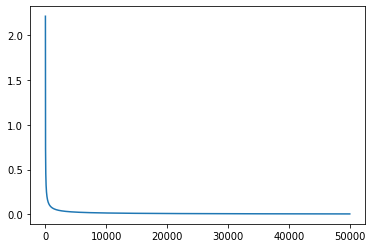

In [65]:
# Gradient Descent
eta = 0.01          # learning rate
w1,w2,w0 = 0, 0, 0  # initial parameter
epsion = 0.0001       # stop criterion

# store all the intermediate values during the descents:
L_val = [] 
k = 0                    # compute the number of descent
ux = u(w1,w2,w0,A)
while LA.norm(dl(A,v,ux)) > epsion :    
    # print(w1,w2,w0)
    # print(dl(A,v,ux))
    (w1,w2,w0) = np.array([w1,w2,w0]) - eta * dl(A,v,ux)
    L_val.append(L(w1,w2,w0,A1,A2))
    # dl_val.append(LA.norm(dl(A,v,ux)))
    ux = u(w1,w2,w0,A)
    k = k+1
    if k == 50000:
        break
print("The number of the iteration is", k)
print("The min of L is", L(w1,w2,w0,A1,A2), "at the parameter", (w1,w2,w0))
plt.plot(range(k), L_val)
plt.show()

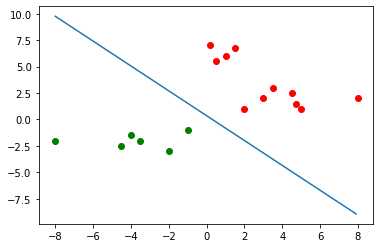

In [66]:
X = np.arange(-8,8,0.1)
Y = -(w1/w2)*X-(w0/w2)
#ax = plt.subplot(111, projection='3d')
plt.scatter(A1[:,0],A1[:,1],c='r')
plt.scatter(A2[:,0],A2[:,1],c='g')
plt.plot(X,Y)
plt.show()